In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import pydotplus
import pandas as pd

In [4]:
def testTensorflow():
    hello = tf.constant('hello tensorflow!')
    sess = tf.Session()
    print(sess.run(hello))

In [5]:
testTensorflow()

b'hello tensorflow!'


In [6]:
def wordCloud():
    #畫圖套件，圖案大小
    plt.figure(figsize=(9,6))
    #numpy套件矩陣/陣列資料型態
    data=np.array([
        ['Milk','Bread','Apple'],
        ['Milk','Bread'],
        ['Milk','Bread','Apple', 'Banana'],
        ['Milk', 'Banana','Rice','Chicken'],
        ['Apple','Rice','Chicken'],
        ['Milk','Bread', 'Banana'],
        ['Rice','Chicken'],
        ['Bread','Apple', 'Chicken'],
        ['Bread','Chicken'],
        ['Apple', 'Banana']])
    #convert the array to list's text
    #設定空的 list
    text_data=[]
    for i in data:
        for j in i:
            #將np陣列得字串一個個加入 list
            text_data.append(j)
    #map: 將 text_data當成 function str 的參數運算
    #回傳後串起來，以 " "隔開

    #
    # map (func, array):
    #   foreach data in array
    #       data = func(data)
    #

    products=' '.join(map(str, text_data))
    # generate 可對全部文字自動分詞
    # 可透過font_path參數設定字體集
    #background_color參數為設定背景顏色，預設顏色為黑色
    # 設定停用詞stopwords
    wordcloud = WordCloud(relative_scaling = 1.0,stopwords = {}).generate(products)
    #產生圖片
    plt.imshow(wordcloud)
    #關閉座標軸
    plt.axis("off")
    #顯示圖
    plt.show()

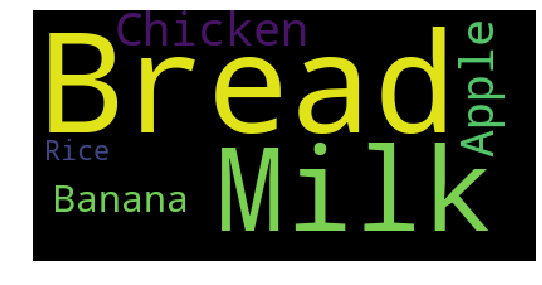

In [7]:
wordCloud()

In [13]:
def drawTree(iris, clf):
    #sklearn.tree.export_graphviz(decision_tree, out_file=None,
    #max_depth=None, feature_names=None, class_names=None,
    #label=’all’, filled=False, leaves_parallel=False,
    #impurity=True, node_ids=False, proportion=False,
    #rotate=False, rounded=False, special_characters=False, precision=3)
    #https://scikit-learn.org/…/sklearn.tree.export_graphviz.html

    #將 Tree導出為 graphviz
    dot_data = tree.export_graphviz(clf, out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True,
    special_characters=True)

    #使用 pydotplus 產生 pdf 檔案
    graph = pydotplus.graph_from_dot_data(dot_data)
    print(graph)
    graph.write_pdf('./iris.pdf')



In [14]:
def decisionTree():
    # 讀入鳶尾花資料
    iris = load_iris()
    iris_X = iris.data
    iris_y = iris.target
    print(type(iris_X))
    print(iris.feature_names) # 變數名稱可以利用 feature_names 屬性取得
    iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
    # 轉換為 data frame
    iris_df.loc[:, "species"] = iris.target # 將品種加入 data frame

    print(iris_df.head()) # 觀察前五個觀測值
    #print(iris_df) # 觀察所有觀測值
    iris_df.hist() # 劃出直方圖
    #劃出散佈圖
    iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='DarkBlue')
    #Kernel Density Estimates 核心密度估計圖，直方圖的平滑機率分布圖
    iris_df.plot.kde()

    # 切分訓練與測試資料
    train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

    # 建立分類器
    clf = tree.DecisionTreeClassifier()
    #訓練資料
    iris_clf = clf.fit(train_X, train_y)
    # 預測資料
    test_y_predicted = iris_clf.predict(test_X)
    print(test_y_predicted)
    # 標準答案
    print(test_y)
    # 績效 - 精確度
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    print(accuracy)
    drawTree(iris, iris_clf)

In [15]:
def testPlot():
    df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
    [6.4, 3.2, 1], [5.9, 3.0, 2]],
    columns=['length', 'width', 'species'])
    #df.plot.scatter(x='length', y='width', c='DarkBlue')
    print(df.loc[:,['length', 'width']])
    print(df.iloc[0:1,[0,1]])

In [16]:
testPlot()

   length  width
0     5.1    3.5
1     4.9    3.0
2     7.0    3.2
3     6.4    3.2
4     5.9    3.0
   length  width
0     5.1    3.5


<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
[0 0 1 2 1 1 2 2 0 2 1 2 1 0 0 2 0 0 2 0 1 0 0 0 2 1 0 0 0 2 0 0 2 2 1 2 1
 0 2 2 1 1 1 1 1]
[0 0 1 2 1 1 2 2 0 2 1 2 1 0 0 2 0 0 2 0 1 0 0 0 2 1 0 0 0 2 0 0 2 2 1 2 1
 0 2 2 1 2 2 1 1]
0.9555555555555556


InvocationException: GraphViz's executables not found

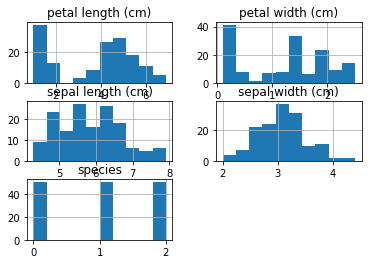

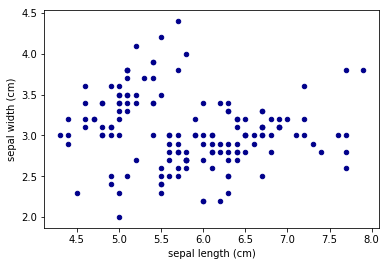

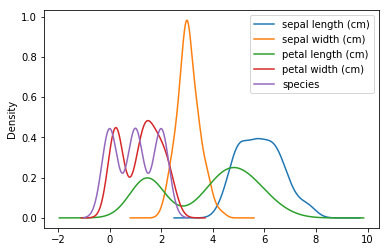

In [17]:
decisionTree()